In [15]:
import boto3
from boto3.dynamodb.conditions import Key, Attr
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby

In [47]:
def review_freq(scores):
    scores.sort()
    score_freq = [len(list(group)) for key, group in groupby(scores)]
    unique_scores = list(set(scores))
    unique_scores.sort()
    return score_freq, unique_scores

In [2]:
dynamodb = boto3.resource('dynamodb')

table = dynamodb.Table("pitchfork_reviews")

response = table.scan(
        FilterExpression=Attr('albumReleaseYear').lt(3000)
)

data = []
data.extend(response['Items'])

# get all data
while 'LastEvaluatedKey' in response:
  try:
    response = table.scan(
          ExclusiveStartKey=response['LastEvaluatedKey'],
          FilterExpression=Attr('albumReleaseYear').lt(3000)
    )
    data.extend(response['Items'])
  except:
    print("sleeping...")
    sleep(30)


In [12]:
print("Average Rating")
scores = [float(d['rating']) for d in data]
print(np.mean(scores))

print("\nRating std")
print(np.std(scores))

Average Rating
7.02326787021

Rating std
1.26988629586


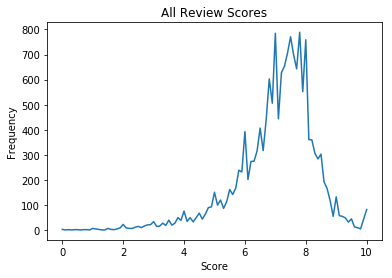

In [55]:
%matplotlib inline

score_freq = [len(list(group)) for key, group in groupby(scores)]
unique_scores = list(set(scores))
unique_scores.sort()
plt.plot(unique_scores, score_freq, label = 'All Reviews')
plt.title('All Review Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [46]:
rap_reviews = [float(d['rating']) for d in data if d['genre'] == 'Rap']
rock_reviews = [float(d['rating']) for d in data if d['genre'] == 'Rock']
electronic_reviews = [float(d['rating']) for d in data if d['genre'] == 'Electronic']
folk_reviews = [float(d['rating']) for d in data if d['genre'] == 'Folk']
jazz_reviews = [float(d['rating']) for d in data if d['genre'] == 'Jazz']
experimental_reviews = [float(d['rating']) for d in data if d['genre'] == 'Experimental']
global_reviews = [float(d['rating']) for d in data if d['genre'] == 'Global']
metal_reviews = [float(d['rating']) for d in data if d['genre'] == 'Metal']

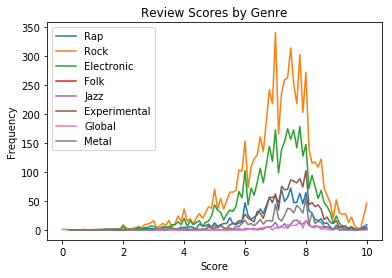

In [64]:
rap_freq, rap_unique = review_freq(rap_reviews)
rock_freq, rock_unique = review_freq(rock_reviews)
elec_freq, elec_unique = review_freq(electronic_reviews)
folk_freq, folk_unique = review_freq(folk_reviews)
jazz_freq, jazz_unique = review_freq(jazz_reviews)
exper_freq, exper_unique = review_freq(experimental_reviews)
glob_freq, glob_unique = review_freq(global_reviews)
metal_freq, metal_unique = review_freq(metal_reviews)

plt.plot(rap_unique, rap_freq, label = 'Rap')
plt.plot(rock_unique, rock_freq, label = 'Rock')
plt.plot(elec_unique, elec_freq, label = 'Electronic')
plt.plot(folk_unique, folk_freq, label = 'Folk')
plt.plot(jazz_unique, jazz_freq, label = 'Jazz')
plt.plot(exper_unique, exper_freq, label = 'Experimental')
plt.plot(glob_unique, glob_freq, label = 'Global')
plt.plot(metal_unique, metal_freq, label = 'Metal')

plt.title('Review Scores by Genre')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.show()